In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
movies_df = pd.read_csv("movies.csv")
movies_df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [11]:
# Rimuovo i valori mancanti dagli attributi "budget" e "gross"
movies_cleaned_df = movies_df.dropna(subset=['budget', 'gross'])
"
# Normalizzo "budget" e "gross" convertendoli in milioni
movies_cleaned_df['budget'] = movies_cleaned_df['budget'] / 1e6
movies_cleaned_df['gross'] = movies_cleaned_df['gross'] / 1e6

movies_cleaned_df[['budget', 'gross']].head(10)

C:\Users\pc\AppData\Local\Temp\ipykernel_11172\711361696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned_df['budget'] = movies_cleaned_df['budget'] / 1e6
C:\Users\pc\AppData\Local\Temp\ipykernel_11172\711361696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned_df['gross'] = movies_cleaned_df['gross'] / 1e6


,budget,gross
0,19.00,46.998772
1,4.50,58.853106
2,18.00,538.375067
3,3.50,83.453539
4,6.00,39.846344
5,0.55,39.754601
6,27.00,115.229890
7,18.00,23.402427
8,54.00,108.185706
9,10.00,15.795189


In [12]:
correlation = movies_cleaned_df[['budget', 'gross']].corr()
print(correlation)

          budget     gross
budget  1.000000  0.740395
gross   0.740395  1.000000


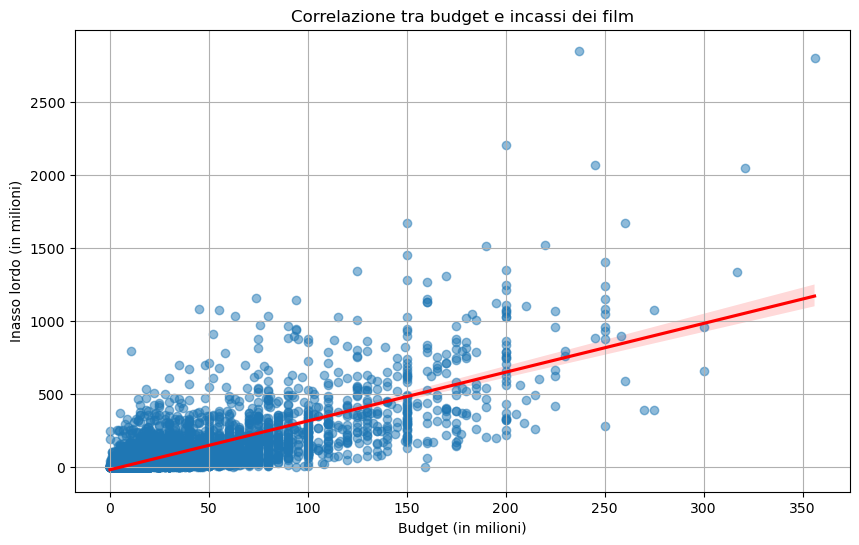

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='gross', data=movies_cleaned_df, scatter=False, color='red')
plt.scatter(movies_cleaned_df['budget'], movies_cleaned_df['gross'], alpha=0.5)
plt.title('Correlazione tra budget e incassi dei film')
plt.xlabel('Budget (in milioni)')
plt.ylabel('Inasso lordo (in milioni)')
plt.grid(True)
plt.show()